58 ['data/uknats2018/task 1_2/Nigel_Bray.20180827-191332.7236.61.igc', 'data/uknats2018/task 1_2/Greg_Emms.20180827-201652.25383.18.igc']


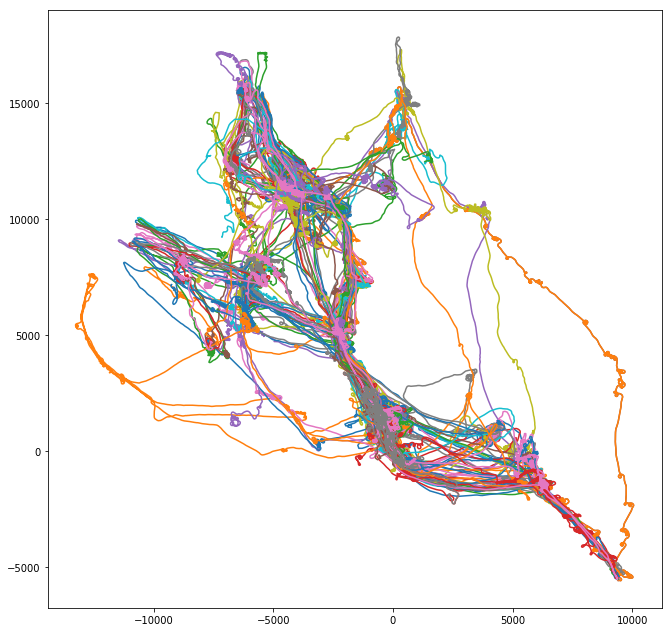

In [3]:
import os
dname = "data/uknats2018/task 1_2"

fnames = [os.path.join(dname, f)  for f in os.listdir(dname)  if f[-4:].lower() == ".igc"]
print(len(fnames), fnames[:2])

from loaders_igc import GLoadIGC, processQaddrelEN
pQs = [ GLoadIGC(f)[0]  for f in fnames ]
for pQ in pQs:  
    processQaddrelEN(pQ)
    
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(11,11))
for pQ in pQs:
    plt.plot(pQ.x, pQ.y)


In [13]:
import pandas


pandas._libs.tslib.Timestamp

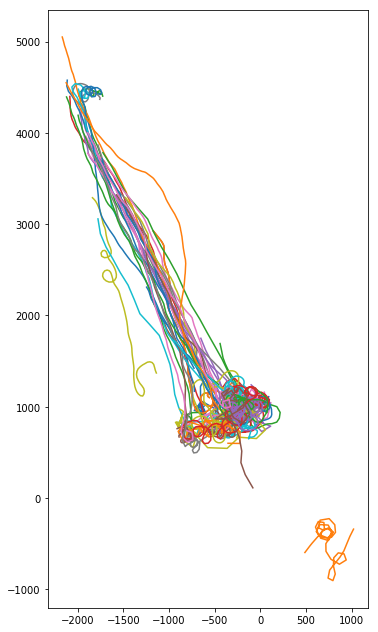

In [49]:
t0 = pQs[2].iloc[0].name
tg = pandas.Timestamp(t0.year, t0.month, t0.day, 12, 55, 0)
td0 = pandas.Timedelta(seconds=5)
td1 = pandas.Timedelta(seconds=4*60)
plt.figure(figsize=(11,11))
for pQ in pQs[:]:
    pQb = pQ[tg-td0:tg+td1]
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(pQb.x, pQb.y)


Text(0.5,1,'The first 4 minutes')

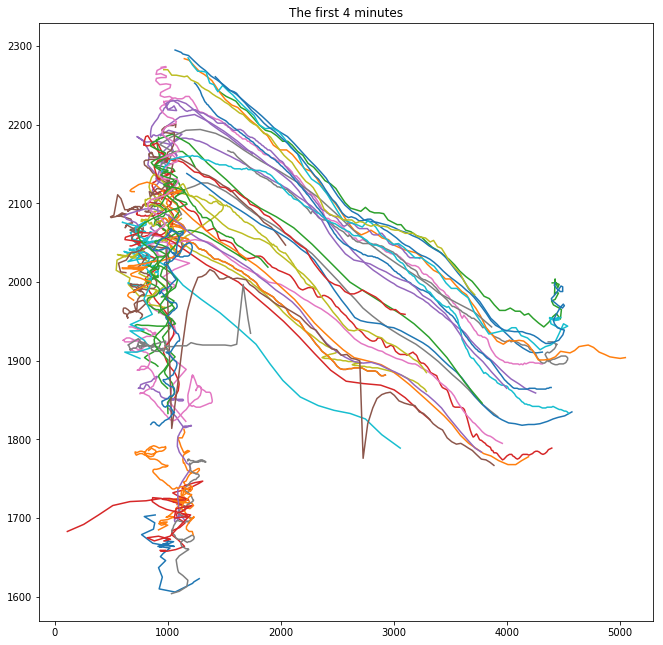

In [51]:
plt.figure(figsize=(11,11))
for pQ in pQs[:]:
    pQb = pQ[tg-td0:tg+td1]
    if not pQb.empty and pQb.iloc[0].y > 0:
        plt.plot(pQb.y, pQb.altb)
plt.title("The first 4 minutes")